### Overview
#### The data has been split into two groups:
#### Training set (train.csv)
#### The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.
#### Test set (test.csv)
#### The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [1]:
#### Importing Libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [15]:
#### importing the datasets 
titanic_train = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\Titanic_survival.csv")
titanic_test = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\Titanic_survival.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train.shape

(891, 12)

In [4]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<BarContainer object of 2 artists>

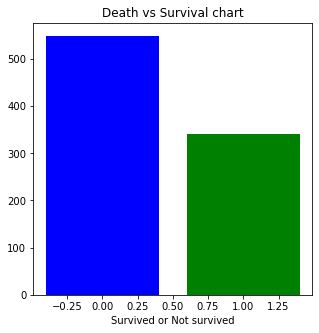

In [7]:
plt.figure(figsize = (5,5))
plt.xlabel('Survived or Not survived')
plt.title('Death vs Survival chart')
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color = ['b','g'])

#### We can conclude from the above chart that more than survivals there are deaths that happened

<BarContainer object of 3 artists>

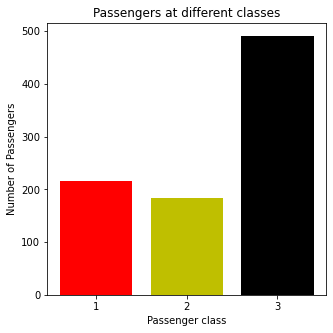

In [9]:

plt.figure(figsize = (5,5))
plt.ylabel ("Number of Passengers")
plt.xlabel ("Passenger class")
plt.title ("Passengers at different classes")
plt.xticks([3,1,2])
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color = ['black','r','y'])

#### From the above bar graph we can conclude that in these three different classes, 3rd class had the highest number of passengers followed by 1st class and 2nd class.

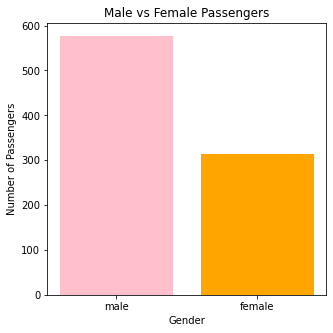

In [10]:
plt.figure(figsize = (5,5))
plt.ylabel ("Number of Passengers")
plt.xlabel ("Gender")
plt.title ("Male vs Female Passengers")
plt.bar(list(titanic_train['Sex'].value_counts().keys()),titanic_train['Sex'].value_counts(),color = ['pink','orange'])
plt.show()

#### There were more number of Males than Females

In [11]:
sum(titanic_train['Survived'].isnull())

0

In [17]:
sum(titanic_train['Age'].isnull())

177

In [19]:
titanic_train = titanic_train.dropna()
sum(titanic_train['Age'].isnull())

0

In [ ]:
# Building the Model

In [25]:
x_train = titanic_train[['Age']]
y_train = titanic_train[['Survived']]

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
sum(titanic_test['Survived'].isnull())


0

In [31]:
sum(titanic_test['Age'].isnull())

177

In [35]:
titanic_test = titanic_test.dropna()
sum(titanic_test['Age'].isnull())

0

In [40]:
x_test = titanic_test[['Age']]
y_pred = dtc.predict(x_test)
print(y_pred)

[1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1]


#### For passenger 1 in the test set I predicted that he will survive
#### for passenger 2 I predicted that he will survive
#### for passenger 3 I predicted that he won't survive, and so on...